In [ ]:
import tensorflow as tf

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
from collections import Counter

In [ ]:
# library for train test split
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/SMSSpamCollection (1)", sep ='\t',names=["label", "message"])
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.shape

(5572, 2)

In [ ]:
#checking null values in the df
df.isnull().sum()

label      0
message    0
dtype: int64

In [ ]:
#checking no of duplicates
df.duplicated().sum()
df= df.drop_duplicates(keep = 'first')

In [ ]:
#removed 403 duplicate values 
df.shape

(5169, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Message types')

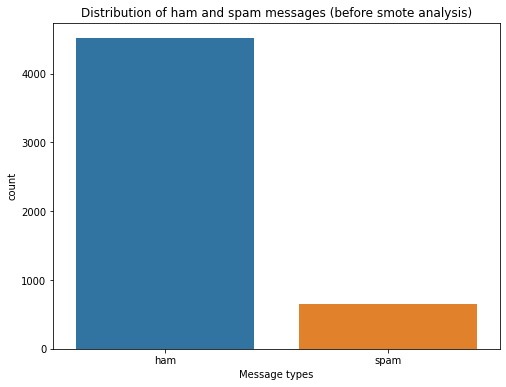

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df.label)
plt.title('Distribution of ham and spam messages (before smote analysis)')
plt.xlabel('Message types')

In [ ]:
#calculating the length of character, word, sentence for spam & ham messages
df['character_len']= df['message'].apply(len)
df['character_len']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     36
5569     57
5570    125
5571     26
Name: character_len, Length: 5169, dtype: int64

In [ ]:
df['word_len'] = df['message'].apply(lambda x: len(str(x).split()))
df['word_len']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       20
1        6
2       28
3       11
4       13
        ..
5567    30
5568     8
5569    10
5570    26
5571     6
Name: word_len, Length: 5169, dtype: int64

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['sent_len'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df['sent_len']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: sent_len, Length: 5169, dtype: int64

In [ ]:
df[df['label']=='ham'].describe()

,character_len,word_len,sent_len
count,4516.000000,4516.000000,4516.000000
mean,70.905890,14.239814,1.806244
std,56.715046,11.179471,1.281910
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,53.000000,11.000000,1.000000
75%,91.000000,19.000000,2.000000
max,910.000000,171.000000,28.000000


In [ ]:
df[df['label']=='spam'].describe()

,character_len,word_len,sent_len
count,653.000000,653.000000,653.000000
mean,137.704441,23.739663,2.983155
std,29.821348,5.931064,1.489645
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,2.000000
50%,148.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,223.000000,35.000000,8.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


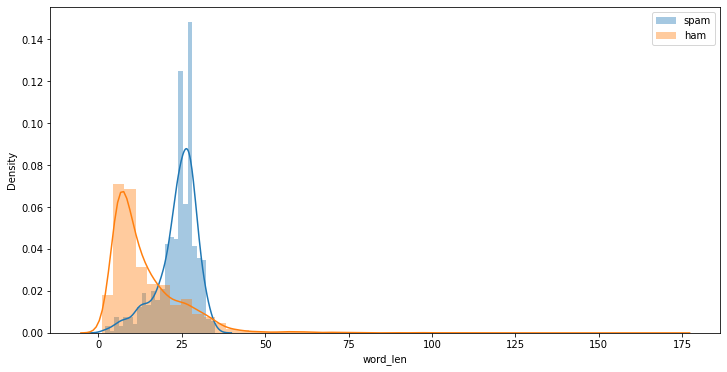

In [ ]:
plt.figure(figsize=(12,6))
#ham_length = df[df['label']=='spam']["word_len"]
#spam_length = df[df['label']=='ham']["word_len"]
sns.distplot(df[df['label']=='spam']["word_len"], label="spam")
sns.distplot(df[df['label']=='ham']["word_len"], label="ham")
plt.legend() 
plt.show()

In [ ]:
df

,label,message,character_len,word_len,sent_len
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,2
1,ham,Ok lar... Joking wif u oni...,29,6,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,ham,U dun say so early hor... U c already then say...,49,11,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,1
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,30,4
5568,ham,Will ü b going to esplanade fr home?,36,8,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,10,2
5570,ham,The guy did some bitching but I acted like i'd...,125,26,1


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())

# From the first assignment
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
for idx in df.index:
    text = clean_text(df['message'][idx])
    df.at[idx, "message"] = text

In [ ]:
df = df.drop(columns = {'word_len', 'sent_len'})

In [ ]:
df


,label,message,character_len
0,ham,go jurong point crazy available bugis n great ...,111
1,ham,ok lar joking wif u oni,29
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,155
3,ham,u dun say early hor u c already say,49
4,ham,nah dont think go usf life around though,61
...,...,...,...
5567,spam,2nd time tried 2 contact u u 750 pound prize 2...,160
5568,ham,ü b going esplanade fr home,36
5569,ham,pity mood soany suggestion,57
5570,ham,guy bitching acted like id interested buying s...,125


In [ ]:
counts = df.groupby('label').count()[['message']]
counts

,message
label,
ham,4516
spam,653


In [ ]:
x = df.message
y = df.label
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)
x_train

2228                                 oh kkwhere take test
5529                                                  one
2149                                             get home
5058    hey next sun 1030 there basic yoga course bugi...
5051                            vote wherever heart guide
                              ...                        
4740                                         pizza u want
474     want 2 get laid tonight want real dogging loca...
3266    44 7732584351 want new nokia 3510i colour phon...
4016    receiving week triple echo ringtone shortly enjoy
879     u secret admirer looking 2 make contact ufind ...
Name: message, Length: 4135, dtype: object